In [1]:
# HIDDEN
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
from scipy import stats
from myst_nb import glue

## Multiple Regression ##

Regression provides one way of predicting a numerical variable, called a *response*, based on other variables called *predictor variables*. The multiple regression model says in essence that

$$
\text{response} ~ = ~ \text{linear combination of predictor variables} + \text{ random noise }
$$

You can think of the first term on the right hand side as a *signal*. The problem is that we don't get to observe the signal. The observed response is the sum of the signal and the noise. The data scientist's task is to use the observations to extract the signal as accurately as possible.

It is worth looking more closely at exactly what is linear in linear regression, now that we are allowing more than one predictor variable. For example, notice that you can fit a quadratic function of $x$ by using the two predictor variables $x_1 = x$ and $x_2 = x^2$. Then the signal

$$
\beta_0 + \beta_1x_1 + \beta_2x_2 ~ = ~ \beta_0 + \beta_1x + \beta_2x^2
$$ 

is a quadratic function of $x$. But it is linear in the coefficients, and it is a linear combination of the two predictor variables $x_1$ and $x_2$.

### The Model ###

As in all of statistical inference, properties of estimates depend on the assumptions under which they are calculated. The *multiple regression model* is a commonly used set of assumptions that describes a particular kind of linear relation between a numerical response variable and a set of predictor variables. You should use it only if you believe that it makes sense for your data.

The model assumes that there are $n$ individuals, on each of whom you have measured the response and the predictor variables. For $1 \le i \le n$, the relation between the variables is assumed to be

$$
Y_i = \beta_0 + \beta_1x_{i,1} + \beta_2x_{i,2} + \cdots + \beta_{p-1}x_{i,p-1} + \epsilon_i
$$

in the notation described below.

- $x_{i,1}, x_{i,2}, \ldots, x_{i,p-1}$ are the observed constant values of $p-1$ predictor variables for individual $i$. They are not random variables. If you prefer to think of the predictor variables as random, this model assumes that you have conditioned on them.

- The intercept $\beta_0$ and slopes $\beta_1, \beta_2, \ldots, \beta_{p-1}$ are unobservable constants and are parameters of the model. There are $p$ of them, hence the notation $p$ for "parameters".

- $\epsilon_i$ is an unobservable random error that has the normal $(0, \sigma^2)$ distribution for some unobservable $\sigma^2$, and $\epsilon_1, \epsilon_2, \ldots, \epsilon_n$ are i.i.d.

- $Y_i$ is the observable response of individual $i$. It is random because $\epsilon_i$ is one of its components.

We will assume that $n > p$, that is, we will assume we have more individuals than parameters. Indeed in this course it is fine for you to think of $n$ as much larger than $p$. 

Two special cases are already familiar.

**$p = 1$: Prediction by a Constant**

When $p = 1$ there is just one parameter: the intercept. There are no predictor variables at all. The model says that for each individual $i$, the response is $Y_i = \beta_0 + \epsilon_i$. This is a case of trying to estimate the response by a constant. 

**$p = 2$: Simple Linear Regression**

The two parameters are the intercept and a slope. The model says that for each individual $i$, the response is $Y_i = \beta_0 + \beta_1x_{i,1} + \epsilon_i$. That is, the response is the value on a hidden straight line, plus some normal noise. This is the simple regression model you used in Data 8.

### Signal and Noise: Matrix Representation ###
For any $p$, the model can be written compactly as

$$
\mathbf{Y} ~ = ~ \mathbf{X}\boldsymbol{\beta} + \boldsymbol{\epsilon}
$$

in the matrix notation described below.

- The *design matrix* $\mathbf{X}$ is an $n \times p$ matrix of real numbers, not random variables. Column 0 of $\mathbf{X}$ is a vector of 1's and Column $j$ for $1 \le j \le p-1$ consists of the $n$ observations on the $j$th predictor variable. For each $i$ in the range 1 through $n$, Row $i$ contains the values of all the predictor variables for individual $i$.

- The *parameter vector* $\boldsymbol{\beta} = [\beta_0 ~~ \beta_1 ~~ \ldots ~~ \beta_{p-1}]^T$ is a $p \times 1$ vector of the coefficients.

- The *error vector* $\boldsymbol{\epsilon}$ is an $n \times 1$ multivariate normal $(\mathbf{0}, \sigma^2\mathbf{I}_n)$ random vector. Its mean vector is an $n \times 1$ vector of 0's and $\mathbf{I}_n$ is the $n \times n$ identity matrix.

- The *response vector* $\mathbf{Y}$ is a random vector that is the sum of the linear signal $\mathbf{X}\boldsymbol{\beta}$ and the normal noise $\boldsymbol{\epsilon}$.

### Ordinary Least Squares ###
Based on the observations of the predictor variables and the response, the goal is to find the best estimates of the intercept and slopes in the model.

These estimates can then be used to predict the response of a new individuals, assuming that the model holds for the new individual as well.

We must select a criterion by which we will decide whether one estimate is better than another. To develop one such criterion, start by noting that any linear function of the predictor variables can be written as $\mathbf{X}\boldsymbol{\gamma}$ where $\boldsymbol{\gamma}$ is some $p \times 1$ vector of coefficients. Think of $\mathbf{X}\boldsymbol{\gamma}$ as an estimate of $\mathbf{Y}$. Then the error in the estimate is $\mathbf{Y} - \mathbf{X}\boldsymbol{\gamma}$.

The goal of *ordinary least squares* (OLS) is to find the vector $\boldsymbol{\gamma}$ that minimises the mean squared error

$$
MSE(\boldsymbol{\gamma}) ~ = ~ \frac{1}{n} \sum_{i=1}^n (Y_i - (\mathbf{X}\boldsymbol{\gamma})_i)^2
$$

This is the same as the $\boldsymbol{\gamma}$ that minimizes the sum of squared errors

$$
SSE(\boldsymbol{\gamma}) ~ = ~ \sum_{i=1}^n (Y_i - (\mathbf{X}\boldsymbol{\gamma})_i)^2
$$

Again for compactness it will help to use matrix notation. For an $n \times 1$ vector $\mathbf{w}$, 

$$
\sum_{i=1}^n w_i^2 ~ = ~ \mathbf{w}^T\mathbf{w} ~ = ~ \mathbf{w} \cdot \mathbf{w} ~ = ~ \| \mathbf{w} \|^2
$$

which is sometimes called the *squared norm* of $\mathbf{w}$.

In this notation, the goal of OLS is to find the $p \times 1$ vector $\hat{\boldsymbol{\beta}}$ that minimizes $\| \mathbf{Y} - \mathbf{X}\boldsymbol{\gamma}\|^2$ over all vectors $\boldsymbol{\gamma}$.

Typically you will also have to estimate the unknown error variance $\sigma^2$. But we will not cover that in this class except in the case $p = 1$.

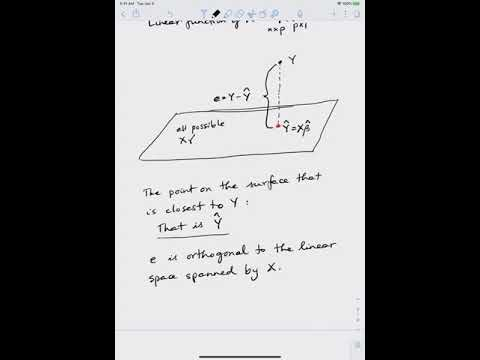

In [2]:
# VIDEO: Estimate: Motivation
from IPython.display import YouTubeVideo

vid_est_mot = YouTubeVideo('VLIDNbHL8u8')
glue("vid_est_mot", vid_est_mot)

```{dropdown} See More
:icon: video
{glue:}`vid_est_mot`
```

### Guessing the Best Estimate of $\boldsymbol{\beta}$ ###

Remember that we have assumed $n > p$. Assume also that $\mathbf{X}$ is of full column rank $p$, that is, none of the predictor variables is a linear combination of the others. By a theorem in linear algebra, it follows that the $p \times p$ matrix $\mathbf{X}^T\mathbf{X}$ has full rank $p$ and is therefore invertible.

The claim is that OLS estimate of $\boldsymbol{\beta}$ is the vector $\hat{\boldsymbol{\beta}}$ defined by

$$
\hat{\boldsymbol{\beta}} ~ = ~ (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{Y}
$$

The claim is motivated by our earlier formula 

$$
\mathbf{b} ~ = ~ \boldsymbol{\Sigma}_\mathbf{X}^{-1}\boldsymbol{\Sigma}_\mathbf{XY}
$$

for the coefficients of the least squares linear predictor a random variable $Y$ based on a random vector $\mathbf{X}$. In fact the new formula is an application of the old one. But we will derive it afresh in our new setting.

The key idea is that of projection: the best $\hat{\boldsymbol{\beta}}$ should be such that the error in the estimate is orthogonal to the linear space spanned by $\mathbf{X}$.

The error in the best estimate is $\mathbf{Y} - \hat{\mathbf{Y}} = \mathbf{Y} - \mathbf{X}\hat{\boldsymbol{\beta}}$. For this error to be orthogonal to linear transformations of $\mathbf{X}$ we must have

$$
\mathbf{X}^T (\mathbf{Y} - \mathbf{X}\hat{\boldsymbol{\beta}}) = 0 ~ \implies \mathbf{X}^T \mathbf{Y} ~ = ~ \mathbf{X}^T \mathbf{X}\hat{\boldsymbol{\beta}}
$$

We have assumed that $\mathbf{X}$ has full column rank, so $\mathbf{X}^T \mathbf{X}$ is invertible. So the natural guess for the best estimator $\hat{\boldsymbol{\beta}}$ is

$$
\hat{\boldsymbol{\beta}} ~ = ~ (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{Y}
$$

Before we go further, notice that $\hat{\boldsymbol{\beta}}$ is a linear function of $\mathbf{Y}$. This makes it straightforward to identify its distribution, which you will do in exercises.

Also note that the estimate of $\mathbf{Y}$ is 

$$
\hat{\mathbf{Y}} ~ = ~ \mathbf{X}\hat{\boldsymbol{\beta}} ~ = ~ \mathbf{X}(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{Y}
$$

which is also a linear function of $\mathbf{Y}$.

### Projection ###

Define the $i$th *residual* as the prediction error $e_i = Y_i - \hat{Y}_i$. Then the $n \times 1$ vector of residuals is

$$
\mathbf{e} ~ = ~ \mathbf{Y} - \hat{\mathbf{Y}} ~ = ~ \mathbf{Y} - \mathbf{X}\hat{\boldsymbol{\beta}}
$$

As we have seen repeatedly, the key to least squares is that the prediction error is orthogonal to the space of allowed functions. Our space of allowed functions is all linear functions of $\mathbf{X}$. So we will show:

**The residual vector is orthogonal to each column of $\mathbf{X}$.**

This is essentially true by construction. Formally, calculate the $p \times 1$ vector $\mathbf{X}^T\mathbf{e}$. Each of its elements is the dot product of $\mathbf{e}$ and one column of $\mathbf{X}$. We will show that each of the elements is 0.

$$
\mathbf{X}^T\mathbf{e} ~ = ~ \mathbf{X}^T(\mathbf{Y} - \hat{\mathbf{Y}}) ~ = ~ \mathbf{X}^T\mathbf{Y} - \mathbf{X}^T\hat{\mathbf{Y}} ~ = ~ \mathbf{X}^T\mathbf{Y} - \mathbf{X}^T\mathbf{X}(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{Y} ~ = ~ \mathbf{X}^T\mathbf{Y} - \mathbf{X}^T\mathbf{Y} ~ = ~ 0
$$

### Least Squares ###

Let $\boldsymbol{\gamma}$ be any $p \times 1$ vector. Then

$$
\begin{align*}
SSE(\boldsymbol{\gamma}) ~  &= ~ \| \mathbf{Y} - \mathbf{X}\boldsymbol{\gamma} \|^2 \\
&= ~ \| (\mathbf{Y} - \mathbf{X}\hat{\boldsymbol{\beta}}) + (\mathbf{X}\hat{\boldsymbol{\beta}} - \mathbf{X}\boldsymbol{\gamma}) \|^2 \\
&= ~ \|\mathbf{Y} - \mathbf{X}\hat{\boldsymbol{\beta}}\|^2 ~+~ \| \mathbf{X}\hat{\boldsymbol{\beta}} - \mathbf{X}\boldsymbol{\gamma} \|^2 + 2(\mathbf{X}\hat{\boldsymbol{\beta}} - \mathbf{X}\boldsymbol{\gamma})^T(\mathbf{Y} - \mathbf{X}\hat{\boldsymbol{\beta}}) \\
&= ~ SSE(\hat{\boldsymbol{\beta}}) ~+~ \| \mathbf{X}\hat{\boldsymbol{\beta}} - \mathbf{X}\boldsymbol{\gamma} \|^2 + 2((\mathbf{X}(\hat{\boldsymbol{\beta}} - \boldsymbol{\gamma}))^T\mathbf{e} \\
&= ~ SSE(\hat{\boldsymbol{\beta}}) ~+~ \| \mathbf{X}\hat{\boldsymbol{\beta}} - \mathbf{X}\boldsymbol{\gamma} \|^2 + 2(\hat{\boldsymbol{\beta}} - \boldsymbol{\gamma})^T\mathbf{X}^T \mathbf{e} \\
&= ~ SSE(\hat{\boldsymbol{\beta}}) ~+~ \| \mathbf{X}\hat{\boldsymbol{\beta}} - \mathbf{X}\boldsymbol{\gamma} \|^2  ~~~~ \text{ by orthogonality} \\
&\ge ~ SSE(\hat{\boldsymbol{\beta}})
\end{align*}
$$

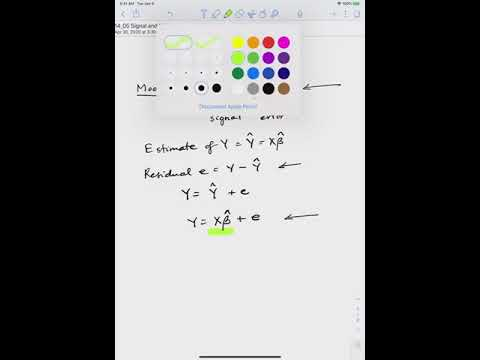

In [3]:
# VIDEO: Signal and Noise

vid_sig_noise = YouTubeVideo('qQG-yyUPgGE')
glue("vid_sig_noise", vid_sig_noise)

```{dropdown} See More
:icon: video
{glue:}`vid_sig_noise`
```

### Signal and Noise, Revisited ###

Our regression model is

$$
\mathbf{Y} ~ = ~ \mathbf{X}\boldsymbol{\beta} + \boldsymbol{\epsilon}
$$

Here

- $\mathbf{X}\boldsymbol{\beta}$ is the unobservable but non-random true signal
- $\boldsymbol{\epsilon}$ is an unobservable random vector consisting of the deviations of $\mathbf{Y}$ from the true plane $\mathbf{X}\boldsymbol{\beta}$. Elements of $\boldsymbol{\epsilon}$ are mutually independent.

Once we have carried out the regression, our estimate of the response vector $\mathbf{Y}$ is the vector $\hat{\mathbf{Y}} = \mathbf{X}\boldsymbol{\hat{\boldsymbol{\beta}}}$.

The residual vector is

$$
\mathbf{e} ~ = ~ \mathbf{Y} - \hat{\mathbf{Y}} ~ = ~ \mathbf{Y} - \mathbf{X}\boldsymbol{\hat{\boldsymbol{\beta}}}
$$

Therefore we have another expression for the response vector $\mathbf{Y}$. This expression is our best attempt at separating the signal from the noise.

$$
\mathbf{Y} ~ = ~ \mathbf{X}\boldsymbol{\hat{\boldsymbol{\beta}}} + \mathbf{e}
$$

It is important to note the distinction between this identity and the model. 

- $\mathbf{X}\boldsymbol{\hat{\boldsymbol{\beta}}}$ is the *observable random estimated* signal.
- $\mathbf{e}$ is the *observable* random vector consisting of the deviations of $\mathbf{Y}$ from the estimated plane $\mathbf{X}\hat{\boldsymbol{\beta}}$. Elements of $\mathbf{e}$ are *not independent* of each other, because they add up to $0$.

In exercises you will show that $\hat{\boldsymbol{\beta}}$ is an unbiased estimator of $\boldsymbol{\beta}$ and that both $\hat{\boldsymbol{\beta}}$ and $\hat{\mathbf{Y}}$ have normal (or multivariate normal) distributions. Both distributions have variance and covariance parameters that depend on the unknown error variance $\sigma^2$. 

### Estimate of $\sigma^2$ ###

It should come as no surprise that under the multiple regression model, there is an unbiased estimator of $\sigma^2$ that has a chi-squared distribution. There is some work involved in establishing that this estimate is

$$
S^2 ~ = ~ \frac{1}{n-p} \sum_{i=1}^n (Y_i - \hat{Y}_i)^2 ~ = ~ \frac{1}{n-p} \| \mathbf{e} \|^2
$$

Some more work establishes that $\frac{n-p}{\sigma^2}S^2$ has the chi-squared $(n-p)$ distribution. 

We'll leave that work for another course. For now, just notice that if the number of data points $n$ is large compared to the number of parameters $p$, then

$$
S^2 ~ = ~ \frac{1}{n-p} \sum_{i=1}^n (Y_i - \hat{Y}_i)^2 ~ \approx ~ \frac{1}{n} \sum_{i=1}^n (Y_i - \hat{Y}_i)^2 ~ = ~ \hat{\sigma}^2
$$

which is the natural mean squared error. If you have a lot of data, you don't have to worry about fine points like dividing by $n-p$ instead of $n$.

**Special Case**

As noted earlier, in the case $p = 1$ you are trying to find the best constant by which to estimate $Y$.

You know that the least squares constant is $\bar{Y}$, and you showed in exercises that 

$$
S^2 ~ = ~ \frac{1}{n-1} \sum_{i=1}^n (Y_i - \bar{Y})^2
$$

is an unbiased estimate of $\sigma^2$. You have shown in exercises that $\frac{n-1}{\sigma^2}S^2$ has the chi-squared $n-1$ distribution under the assumption that the data are i.i.d. normal variables. This is the special case of the result stated above for general $p$.

### Confidence Intervals ###

The upshot of this discussion is that if $n$ is large compared to $p$ – that is, if you have a lot of observations compared to the number of predictors – then you can use ordinary normal theory to construct confidence intervals for the parameters $\hat{\beta}$.

For example, a 95% confidence interval for the parameter $\beta_i$ is $\hat{\boldsymbol{\beta}} [i] \pm 2SD(\hat{\boldsymbol{\beta}} [i])$. 

Here $\hat{\boldsymbol{\beta}}[i]$ is the $i$th element of the estimate vector $\hat{\boldsymbol{\beta}}$. 

The variance of $\hat{\boldsymbol{\beta}}[i]$ is the $i$th diagonal element of the covariance matrix of $\hat{\boldsymbol{\beta}}$. You will see in exercises that this involves the error variance $\sigma^2$. Typically, $\sigma^2$ is unknown. But you can estimate it by the mean squared error $\hat{\sigma}^2$ to get an approximate 95% confidence interval for $\beta_i$.